## XGB regression on bandgap

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re
%matplotlib inline
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [47]:
#!pip install scikeras
from sklearn import metrics,linear_model
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, BayesianRidge, Lasso, RidgeCV, LassoCV, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, RepeatedKFold
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor,RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, r2_score, mean_squared_error, mean_absolute_error

In [89]:
df= pd.read_excel("Results_Eg/withDescriptors_DFT_D3_ACS_AMI_348_hetero_Ef_Eg.xlsx")

In [90]:
df.head()

,material,spin_state,formation_energy,Ef_per_cell,bandgap,mag_mom_table,sitewise_axiswise_tot_mu,sitewise_mu_mag,axiswise_tot_mu,total_mag,...,avg_electronegativity,delta_a1a2_electronegativity,delta_bx_electronegativity,max_diff_electronegativity,std_electronegativity,avg_electron_affinity,delta_a1a2_electron_affinity,delta_bx_electron_affinity,max_diff_electron_affinity,std_electron_affinity
0,Mn1Sc1Bi4Se8_Sn4Te6,FM,-15.411348,-7.705674,0.0,"[('x', ['s', 'p', 'd', 'tot'], [[-0.001, -0.00...","[[-0.102, -0.051, 4.577], [-0.001, -0.0, 0.015...","[4.578420469987439, 0.015033296378372907, 0.0,...","[-0.107, -0.053, 4.655999999999998]",4.657531,...,2.139583,0.19,0.289333,1.19,0.333598,1.516514,0.188,0.033882,2.020670,0.622821
1,Mn1Y1Sb4Se8_Sn4Te6,FM,-14.759108,-7.379554,0.0,"[('x', ['s', 'p', 'd', 'f', 'tot'], [[-0.0, -0...","[[-0.01, -0.004, 4.57], [-0.0, -0.0, 0.009], [...","[4.5700126914484605, 0.009, 0.0, 0.013, 0.013,...","[-0.01, -0.004, 4.651]",4.651012,...,2.158750,0.33,0.339333,1.33,0.335563,1.538745,0.307,0.068428,2.020670,0.597313
2,Mn1Ag1Sb4Te8_Sn4Te6,FM,-9.713931,-4.856966,0.0,"[('x', ['s', 'p', 'd', 'tot'], [[-0.0, -0.0, -...","[[-0.012, -0.007, 4.502], [0.0, 0.0, -0.001], ...","[4.502021434866786, 0.001, 0.001, 0.012, 0.012...","[-0.014000000000000002, -0.007, 4.402999999999...",4.403028,...,2.038333,0.38,0.039333,0.55,0.117000,1.563605,1.302,0.035232,1.970876,0.529256
3,Mn1Rh1Sb4S8_Sn4Se6,AFM,-13.765300,-6.882650,0.0,"[('x', ['s', 'p', 'd', 'tot'], [[-0.0, -0.0, -...","[[-0.048, 0.034, 4.552], [-0.509, 0.265, -0.52...","[4.55238003685984, 0.775751248790487, 0.025632...","[-0.6310000000000001, 0.3390000000000001, 4.052]",4.114825,...,2.325417,0.73,0.089333,1.03,0.307001,1.604588,1.137,0.076174,2.077104,0.571425
4,Mn1Zr1Pb4Te8_Sb4Te6,FM,-12.878048,-6.439024,0.0,"[('x', ['s', 'p', 'd', 'tot'], [[0.001, 0.0, 0...","[[0.052, 0.029, 4.509], [-0.0, -0.0, 0.046], [...","[4.509393085549319, 0.046, 0.001, 0.003, 0.005...","[0.040999999999999995, 0.022, 4.35]",4.350249,...,1.986667,0.22,0.080000,0.77,0.199701,1.401218,0.426,0.168094,1.970876,0.716648


In [91]:
# df.describe()

In [92]:
# df.columns

In [93]:
X_eg = df[['avg_vdw_radius', 'delta_a1a2_vdw_radius', 'delta_bx_vdw_radius', 'max_diff_vdw_radius', 'std_vdw_radius', 
           'avg_covalent_radius', 'delta_a1a2_covalent_radius', 'delta_bx_covalent_radius', 'max_diff_covalent_radius', 
           'std_covalent_radius', 'avg_atomic_radius', 'delta_a1a2_atomic_radius', 'delta_bx_atomic_radius', 'max_diff_atomic_radius', 
           'std_atomic_radius', 'avg_atomic_volume', 'delta_a1a2_atomic_volume', 'delta_bx_atomic_volume', 'max_diff_atomic_volume', 
           'std_atomic_volume', 'avg_dipole_polarizability', 'delta_a1a2_dipole_polarizability', 'delta_bx_dipole_polarizability', 
           'max_diff_dipole_polarizability', 'std_dipole_polarizability', 'avg_val_electrons', 'delta_a1a2_val_electrons', 
           'delta_bx_val_electrons', 'max_diff_val_electrons', 'std_val_electrons', 'avg_unp_electrons', 'delta_a1a2_unp_electrons',
           'delta_bx_unp_electrons', 'max_diff_unp_electrons', 'std_unp_electrons', 'avg_ion_energies', 'delta_a1a2_ion_energies', 
           'delta_bx_ion_energies', 'max_diff_ion_energies', 'std_ion_energies', 'avg_no_electrons', 'delta_a1a2_no_electrons', 
           'delta_bx_no_electrons', 'max_diff_no_electrons', 'std_no_electrons', 'avg_electronegativity', 'delta_a1a2_electronegativity',
           'delta_bx_electronegativity', 'max_diff_electronegativity', 'std_electronegativity', 'avg_electron_affinity', 
           'delta_a1a2_electron_affinity', 'delta_bx_electron_affinity', 'max_diff_electron_affinity', 'std_electron_affinity']]

y_eg = df[['bandgap']]

feature_list = list(X_eg.columns)

X_eg = np.array(X_eg)
y_eg = np.array(y_eg)

In [94]:
X_eg.shape

(348, 55)

In [95]:
X_train_eg,X_test_eg,y_train_eg,y_test_eg = train_test_split(X_eg, y_eg, test_size=0.2, random_state=42)
X_train_eg,X_val_eg,y_train_eg,y_val_eg = train_test_split(X_train_eg, y_train_eg,test_size=0.25,random_state=42)
xgb_eg = xgb.XGBRegressor(random_state=42)
xgb_eg.fit(X_train_eg, y_train_eg)

prediction_eg_train = xgb_eg.predict(X_train_eg)
prediction_eg_val = xgb_eg.predict(X_val_eg)

print('Mean absolute error of training set: {:0.3f}'.format(metrics.mean_absolute_error(y_train_eg,prediction_eg_train)))
print('Mean absolute error of validation set: {:0.3f}'.format(metrics.mean_absolute_error(y_val_eg,prediction_eg_val)))
print('\n')
print('Root mean squared error of training set: {:0.3f}'.format(sqrt(metrics.mean_squared_error(y_train_eg,prediction_eg_train))))
print('Root mean squared error of validation set: {:0.3f}'.format(sqrt(metrics.mean_squared_error(y_val_eg,prediction_eg_val))))
print('\n')
r_sq_eg_train = metrics.r2_score(y_train_eg,prediction_eg_train)
r_sq_eg_val = metrics.r2_score(y_val_eg,prediction_eg_val)

print('R^2 score on training data: {:0.3f}'.format(r_sq_eg_train))
print('R^2 score on validation data: {:0.3f}'.format(r_sq_eg_val))

Mean absolute error of training set: 0.000
Mean absolute error of validation set: 0.012


Root mean squared error of training set: 0.001
Root mean squared error of validation set: 0.033


R^2 score on training data: 1.000
R^2 score on validation data: 0.755


Mean absolute error of test set: 0.016
Root mean squared error of test set: 0.038
R^2 score on test data: 0.792


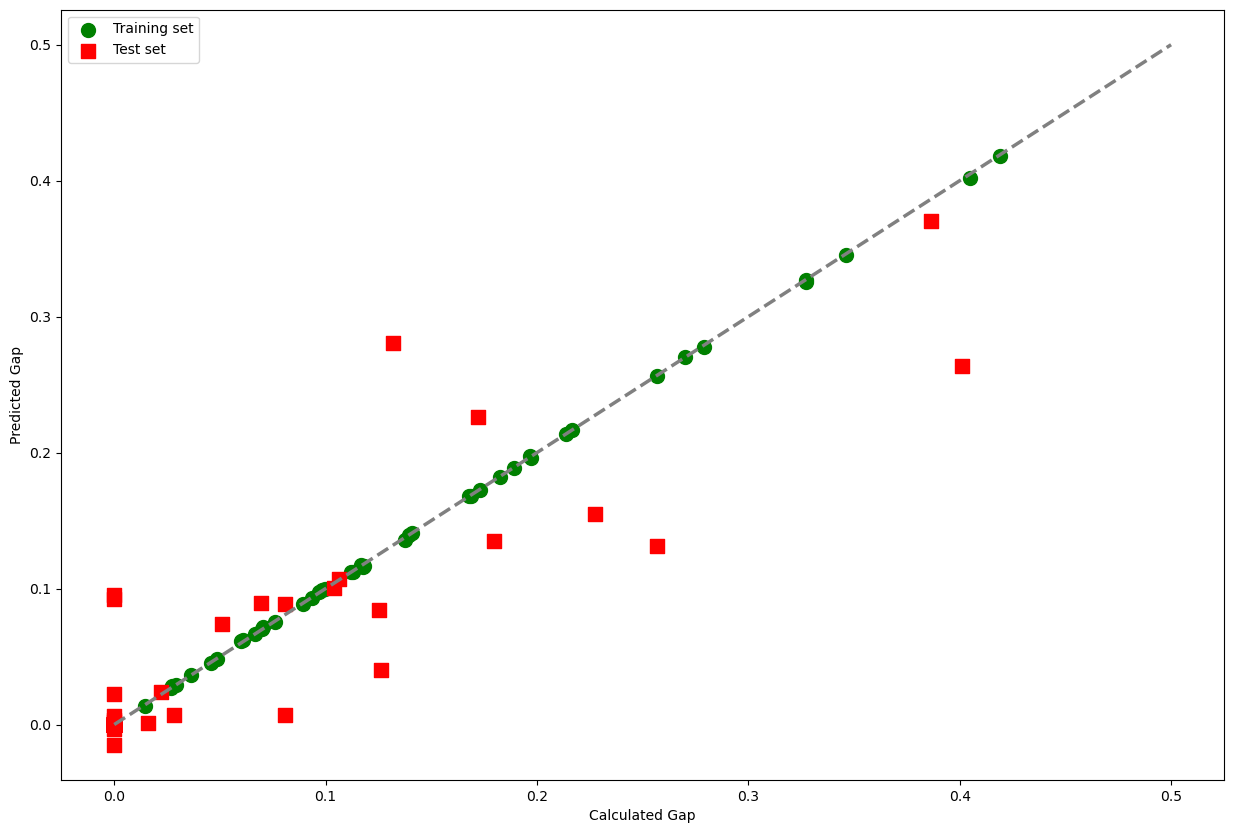

In [96]:
prediction_eg_test = xgb_eg.predict(X_test_eg)
r_sq_eg_test = metrics.r2_score(y_test_eg,prediction_eg_test)

print('Mean absolute error of test set: {:0.3f}'.format(metrics.mean_absolute_error(y_test_eg,prediction_eg_test)))
print('Root mean squared error of test set: {:0.3f}'.format(sqrt(metrics.mean_squared_error(y_test_eg,prediction_eg_test))))
print('R^2 score on test data: {:0.3f}'.format(r_sq_eg_test))

plt.figure(figsize = (15,10))
plt.scatter(y_train_eg,prediction_eg_train ,color = 'g', s=100, marker='o', label='Training set')
plt.scatter(y_test_eg,prediction_eg_test, color = 'r', s=100, marker='s', label='Test set')
plt.plot([0,0.5],[0,0.5],color='gray',linestyle='dashed',linewidth=2.5)
plt.xlabel('Calculated Gap'),plt.ylabel('Predicted Gap')
plt.legend()
plt.show()

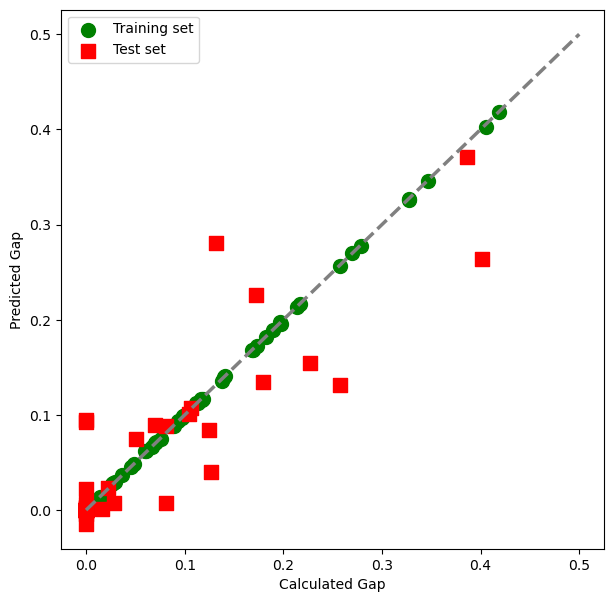

In [97]:
plt.figure(figsize = (7,7))
plt.scatter(y_train_eg,prediction_eg_train ,color = 'g', s=100, marker='o', label='Training set')
plt.scatter(y_test_eg,prediction_eg_test, color = 'r', s=100, marker='s', label='Test set')
plt.plot([0,0.5],[0,0.5],color='gray',linestyle='dashed',linewidth=2.5)
plt.xlabel('Calculated Gap'),plt.ylabel('Predicted Gap')
plt.legend()
plt.show()

In [104]:
import optuna
import random

def objective_eg(trial):
    n_estimators = trial.suggest_int('n_estimators',10,150)
    max_depth = trial.suggest_int('max_depth',5,50)
    learning_rate = trial.suggest_float('learning_rate', 0.05, 0.3, log=True)
    subsample = trial.suggest_float('subsample', 0.1, 1.0)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0.1, 1.0)
    gamma = trial.suggest_float('gamma', 0, 10)
    reg_alpha = trial.suggest_float('reg_alpha', 1e-8, 10, log=True)
    reg_lambda = trial.suggest_float('reg_lambda', 1e-8, 10, log=True)
    min_child_weight = trial.suggest_int('min_child_weight', 1, 10)
    scale_pos_weight = trial.suggest_int('scale_pos_weight', 1, 10)
    max_delta_step = trial.suggest_float('max_delta_step', 0, 10)
    random_state = 42

    model_xgb = xgb.XGBRegressor(n_estimators=n_estimators,max_depth=max_depth,learning_rate=learning_rate,subsample=subsample,
                                     colsample_bytree=colsample_bytree,gamma=gamma,reg_alpha=reg_alpha,reg_lambda=reg_lambda,
                                     min_child_weight=min_child_weight,scale_pos_weight=scale_pos_weight,max_delta_step=max_delta_step,
                                     random_state=random_state)

    # Train model
    xgb_eg_optuna = model_xgb.fit(X_train_eg, y_train_eg)

    cv = KFold(n_splits=5,shuffle=True,random_state=random_state)
    cv_scores_xgb_eg_optuna = cross_val_score(xgb_eg_optuna,X_train_eg,y_train_eg,cv=cv,scoring='r2',n_jobs=-1)
    avg_r2_cv_xgb_eg_optuna = cv_scores_xgb_eg_optuna.mean()

    # Return best R2 scores
    r2_train = r2_score(y_train_eg, model_xgb.predict(X_train_eg))
    r2_test = r2_score(y_test_eg, model_xgb.predict(X_test_eg))
#    return avg_r2_cv_xgb_eg_optuna
    return r2_train,avg_r2_cv_xgb_eg_optuna,r2_test

# Run Optuna optimization
#study = optuna.create_study(direction='minimize') # for minimizing loss
study_xgb = optuna.create_study(directions = ['maximize','maximize','maximize']) #(direction='maximize')
study_xgb.optimize(objective_eg, n_trials=500)

[I 2025-04-03 17:49:56,876] A new study created in memory with name: no-name-25a34f35-5dc7-40bb-94b8-88df0069d57c
[I 2025-04-03 17:49:56,976] Trial 0 finished with values: [-0.0020257447140115126, -0.026916971198403195, -0.011930969233149291] and parameters: {'n_estimators': 135, 'max_depth': 28, 'learning_rate': 0.15004537213799984, 'subsample': 0.35650894784933373, 'colsample_bytree': 0.2950151266593193, 'gamma': 7.259159353244834, 'reg_alpha': 2.8861051341071856e-06, 'reg_lambda': 0.0006099178614140301, 'min_child_weight': 5, 'scale_pos_weight': 8, 'max_delta_step': 4.067223001799269}.
[I 2025-04-03 17:49:57,057] Trial 1 finished with values: [-0.0008904307364780983, -0.02130622690375472, -0.009084571866490032] and parameters: {'n_estimators': 130, 'max_depth': 47, 'learning_rate': 0.07056314845037387, 'subsample': 0.4678348618980551, 'colsample_bytree': 0.9639217604201396, 'gamma': 8.92095072621728, 'reg_alpha': 0.0005894948409911381, 'reg_lambda': 2.8202237564902385e-08, 'min_chil

In [105]:
best_models = study_xgb.best_trials
#PRINT('Trial number',
for i in range(len(best_models)):
    print('Model No:',i,'\n=======', '\nTrial No:',best_models[i].number, '\nTrain R2:',best_models[i].values[0],'\nValid R2:',best_models[i].values[1],
         '\nTest  R2:',best_models[i].values[2],'\nParams  :',best_models[i].params,'\n=======')

Model No: 0 
Trial No: 311 
Train R2: 0.711972189404283 
Valid R2: 0.4008699573761823 
Test  R2: 0.6784802989311465 
Params  : {'n_estimators': 67, 'max_depth': 7, 'learning_rate': 0.11663619609346886, 'subsample': 0.884484634291991, 'colsample_bytree': 0.3990737997557684, 'gamma': 0.0223515249503492, 'reg_alpha': 1.4397706353630273e-05, 'reg_lambda': 3.7647692018389577e-07, 'min_child_weight': 10, 'scale_pos_weight': 3, 'max_delta_step': 1.138931102231906} 
Model No: 1 
Trial No: 409 
Train R2: 0.7902997678932072 
Valid R2: 0.3315502349274188 
Test  R2: 0.6648283603122014 
Params  : {'n_estimators': 67, 'max_depth': 16, 'learning_rate': 0.24280941327988856, 'subsample': 0.7475029358248845, 'colsample_bytree': 0.4422371158183592, 'gamma': 0.0223515249503492, 'reg_alpha': 1.4397706353630273e-05, 'reg_lambda': 1.2934649685604944e-08, 'min_child_weight': 6, 'scale_pos_weight': 1, 'max_delta_step': 6.564470826002373} 
Model No: 2 
Trial No: 450 
Train R2: 0.7435261795914923 
Valid R2: 0.39

In [115]:
import optuna
import random

def detailed_objective_eg(trial):
    n_estimators = trial.suggest_int('n_estimators',10,150)
    max_depth = trial.suggest_int('max_depth',5,50)
    learning_rate = trial.suggest_float('learning_rate', 0.05, 0.3, log=True)
    subsample = trial.suggest_float('subsample', 0.1, 1.0)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0.1, 1.0)
    gamma = trial.suggest_float('gamma', 0, 10)
    reg_alpha = trial.suggest_float('reg_alpha', 1e-8, 10, log=True)
    reg_lambda = trial.suggest_float('reg_lambda', 1e-8, 10, log=True)
    min_child_weight = trial.suggest_int('min_child_weight', 1, 10)
    scale_pos_weight = trial.suggest_int('scale_pos_weight', 1, 10)
    max_delta_step = trial.suggest_float('max_delta_step', 0, 10)
    random_state = 42

    model_xgb = xgb.XGBRegressor(n_estimators=best_models[4].params['n_estimators'],
                                    max_depth=best_models[4].params['max_depth'],
                                    learning_rate=best_models[4].params['learning_rate'],
                                    subsample=best_models[4].params['subsample'],
                                    colsample_bytree=best_models[4].params['colsample_bytree'],
                                    gamma=best_models[4].params['gamma'],
                                    reg_alpha=best_models[4].params['reg_alpha'],
                                    reg_lambda=best_models[4].params['reg_lambda'],
                                    min_child_weight=best_models[4].params['min_child_weight'],
                                    scale_pos_weight=best_models[4].params['scale_pos_weight'],
                                    max_delta_step=best_models[4].params['max_delta_step'],
                                    random_state=random_state)

    # Train model
    xgb_eg_optuna = model_xgb.fit(X_train_eg,y_train_eg)

    cv = KFold(n_splits=5,shuffle=True,random_state=random_state)
    cv_scores_xgb_eg_optuna = cross_val_score(xgb_eg_optuna,X_train_eg,y_train_eg,cv=cv,scoring='r2',n_jobs=-1)
    avg_r2_cv_xgb_eg_optuna = cv_scores_xgb_eg_optuna.mean()

    # Return best R2 scores and MAE
    r2_train = r2_score(y_train_eg, model_xgb.predict(X_train_eg))
    r2_test = r2_score(y_test_eg, model_xgb.predict(X_test_eg))
    r2_val = r2_score(y_val_eg, model_xgb.predict(X_val_eg))

    mae_train = mean_absolute_error(y_train_eg, model_xgb.predict(X_train_eg))
    mae_test = mean_absolute_error(y_test_eg, model_xgb.predict(X_test_eg))
    mae_val = mean_absolute_error(y_val_eg, model_xgb.predict(X_val_eg))
    
    print('R2 scores (train, CV, val, test) = ', r2_train,avg_r2_cv_xgb_eg_optuna,r2_val,r2_test)
    print('MAE values (train, val, test) = ', mae_train,mae_val,mae_test)

    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,5))
    ax1.scatter(y_train_eg, model_xgb.predict(X_train_eg).flatten(),label='Train($R^2$ = '+str(f'{r2_train:.3f}')+')',marker='o',color='green')
    ax1.scatter(y_val_eg, model_xgb.predict(X_val_eg).flatten(),label='Val($R^2$ = '+str(f'{avg_r2_cv_xgb_eg_optuna:.3f}')+')',marker='^',color='blue')
    ax1.scatter(y_test_eg, model_xgb.predict(X_test_eg).flatten(),label='Test($R^2$ = '+str(f'{r2_test:.3f}')+')',marker='s',color='red')
    ax1.plot([0,0.5],[0,0.5],color='gray',linestyle='dashed',linewidth=2.5)
    ax1.set_xlabel('Calculated Gap'),ax1.set_ylabel('Predicted Gap')
    ax1.legend()
    
    ax2.scatter(y_train_eg, model_xgb.predict(X_train_eg).flatten(),label='Train($R^2$ = '+str(f'{r2_train:.3f}')+')',marker='o',color='green')
    ax2.scatter(y_test_eg, model_xgb.predict(X_test_eg).flatten(),label='Test($R^2$ = '+str(f'{r2_test:.3f}')+')',marker='s',color='red')
    ax2.plot([0,0.5],[0,0.5],color='gray',linestyle='dashed',linewidth=2.5)
    ax2.set_xlabel('Calculated Gap'),ax1.set_ylabel('Predicted Gap')
    ax2.legend()
    
    plt.show()

R2 scores (train, CV, val, test) =  0.8481660670124561 0.3589793718503792 0.5746926297986327 0.6484396488979005
MAE values (train, val, test) =  0.01778142099915283 0.022430246528408297 0.023299940570912094


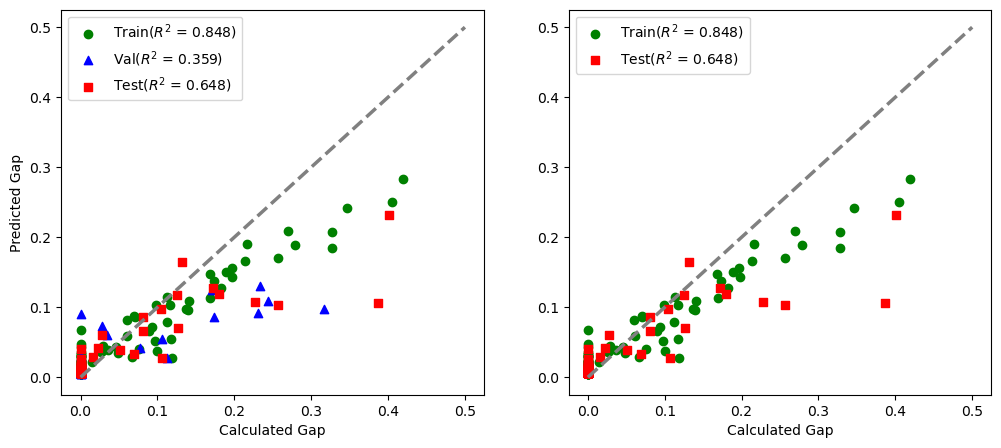

In [116]:
detailed_objective_eg(study_xgb.best_trials[4])

R2 scores (train, CV, val, test) =  0.7303362182457585 0.37070537582949425 0.6219513409857022 0.7078981127045895
MAE values (train, val, test) =  0.021008055310103944 0.020465423424199963 0.021614232670441207


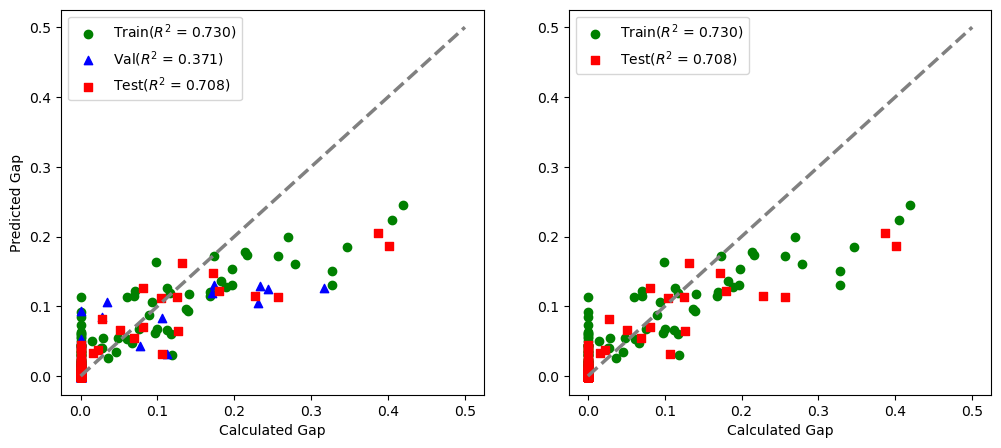

In [114]:
detailed_objective_eg(study_xgb.best_trials[3])

R2 scores (train, CV, val, test) =  0.7435261795914923 0.3937415043158185 0.47855902551526097 0.6031674221789313
MAE values (train, val, test) =  0.019219834039791425 0.022619190377016922 0.024313558188923567


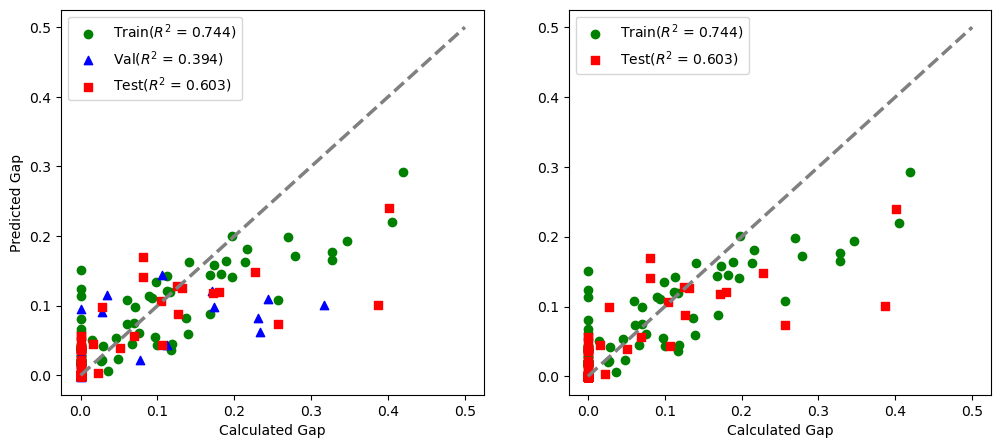

In [112]:
detailed_objective_eg(study_xgb.best_trials[2])

R2 scores (train, CV, val, test) =  0.7902997678932072 0.3315502349274188 0.5025690171863795 0.6648283603122014
MAE values (train, val, test) =  0.017882842799592517 0.022437274752059987 0.022309343740616057


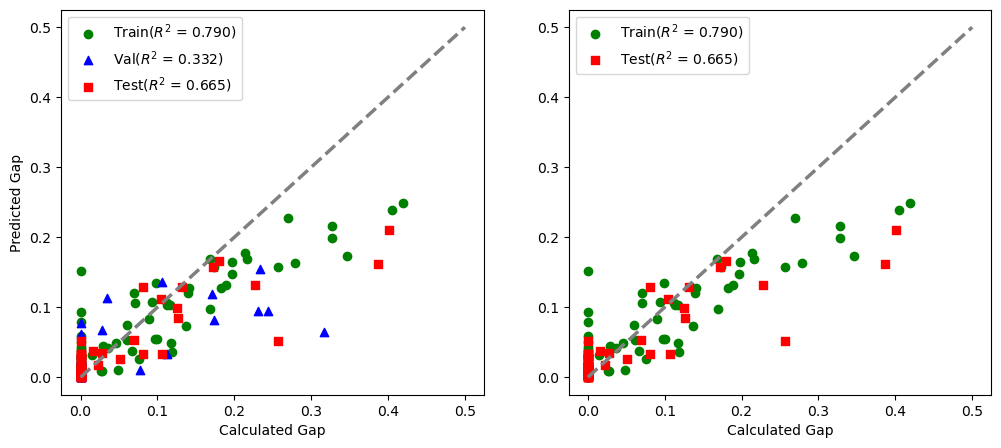

In [109]:
detailed_objective_eg(study_xgb.best_trials[1])

R2 scores (train, CV, val, test) =  0.711972189404283 0.4008699573761823 0.6221989966042503 0.6784802989311465
MAE values (train, val, test) =  0.020881357886369942 0.021547805184136484 0.022044846001171545


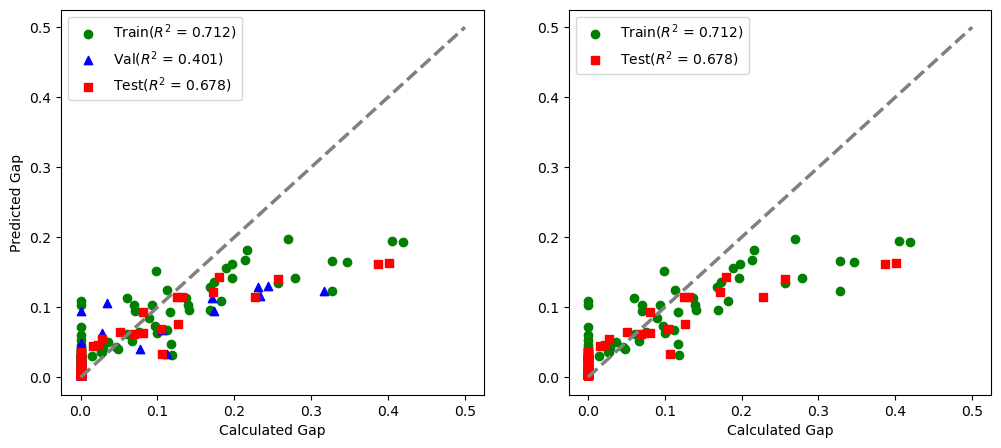

In [107]:
detailed_objective_eg(study_xgb.best_trials[0])

In [59]:
## Data from FFNN model

In [117]:
X_train = pd.read_csv('Results_Eg/X_train_ffnn.csv')
X_val = pd.read_csv('Results_Eg/X_val_ffnn.csv')
X_test = pd.read_csv('Results_Eg/X_test_ffnn.csv')

y_train = pd.read_csv('Results_Eg/y_train_ffnn.csv')
y_val = pd.read_csv('Results_Eg/y_val_ffnn.csv')
y_test = pd.read_csv('Results_Eg/y_test_ffnn.csv')

In [118]:
y_train_eg = y_train['57']
y_val_eg = y_val['57']
y_test_eg = y_test['57']

Mean absolute error of training set: 0.000
Mean absolute error of validation set: 0.015
Mean absolute error of test set: 0.010


R^2 score on training data: 1.000
R^2 score on validation data: 0.857
R^2 score on test data: 0.671




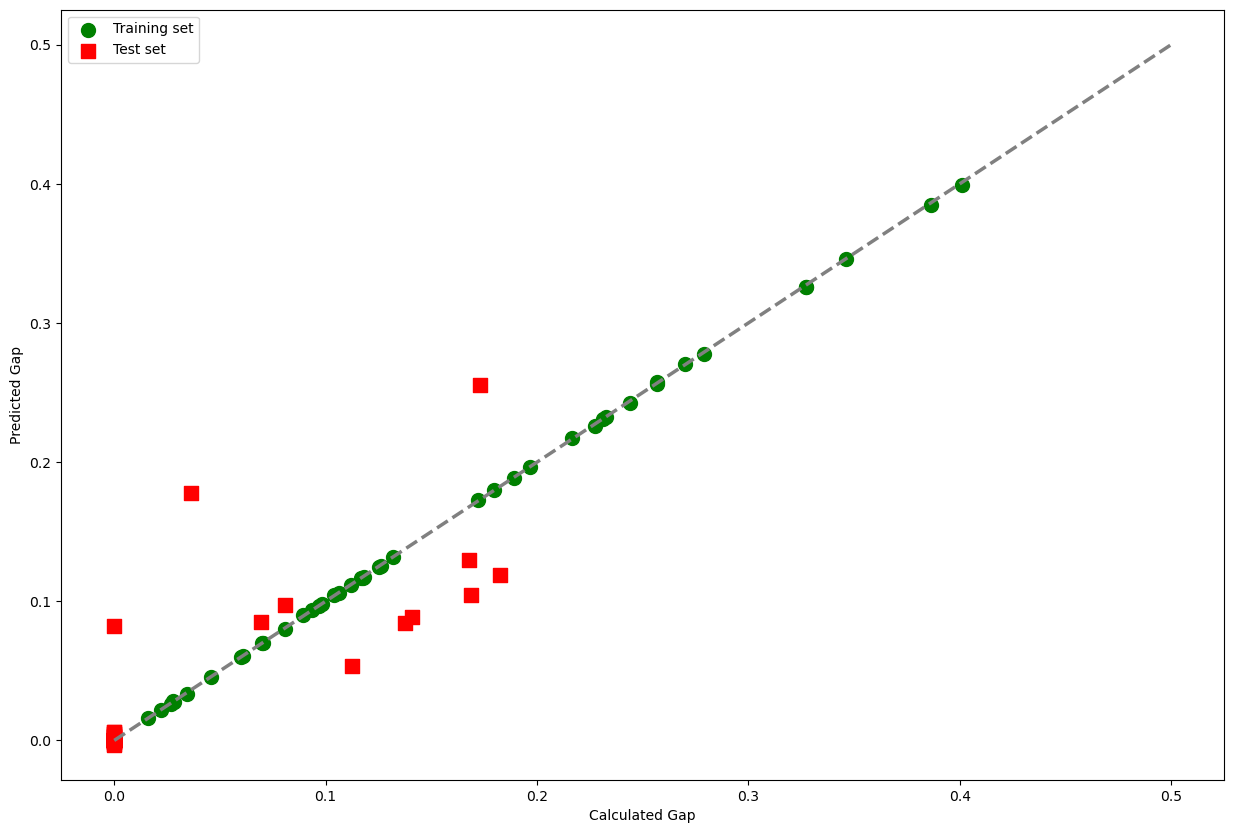

In [119]:
xgb_eg = xgb.XGBRegressor(random_state=42)
xgb_eg.fit(X_train, y_train_eg)

prediction_eg_train = xgb_eg.predict(X_train)
prediction_eg_val = xgb_eg.predict(X_val)
prediction_eg_test = xgb_eg.predict(X_test)

print('Mean absolute error of training set: {:0.3f}'.format(metrics.mean_absolute_error(y_train_eg,prediction_eg_train)))
print('Mean absolute error of validation set: {:0.3f}'.format(metrics.mean_absolute_error(y_val_eg,prediction_eg_val)))
print('Mean absolute error of test set: {:0.3f}'.format(metrics.mean_absolute_error(y_test_eg,prediction_eg_test)))
print('\n')
r_sq_eg_train = metrics.r2_score(y_train_eg,prediction_eg_train)
r_sq_eg_val = metrics.r2_score(y_val_eg,prediction_eg_val)
r_sq_eg_test = metrics.r2_score(y_test_eg,prediction_eg_test)

print('R^2 score on training data: {:0.3f}'.format(r_sq_eg_train))
print('R^2 score on validation data: {:0.3f}'.format(r_sq_eg_val))
print('R^2 score on test data: {:0.3f}'.format(r_sq_eg_test))
print('\n')

plt.figure(figsize = (15,10))
plt.scatter(y_train_eg,prediction_eg_train ,color = 'g', s=100, marker='o', label='Training set')
plt.scatter(y_test_eg,prediction_eg_test, color = 'r', s=100, marker='s', label='Test set')
plt.plot([0,0.5],[0,0.5],color='gray',linestyle='dashed',linewidth=2.5)
plt.xlabel('Calculated Gap'),plt.ylabel('Predicted Gap')
plt.legend()
plt.show()

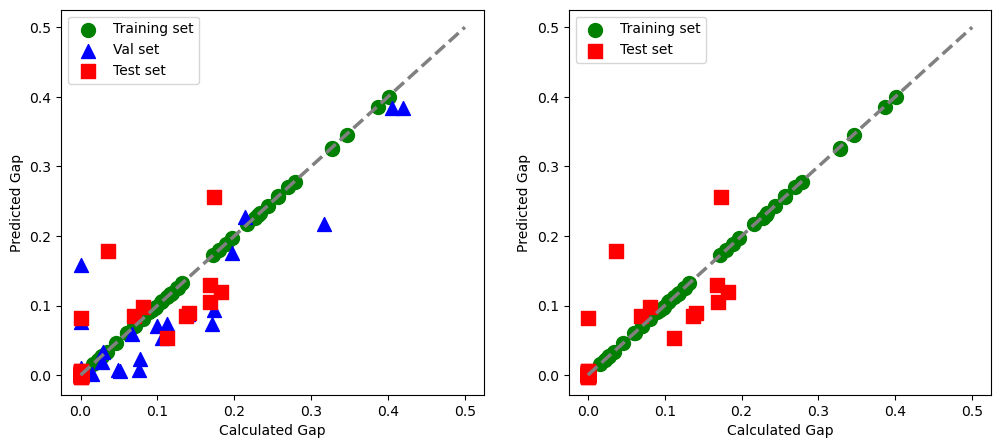

In [120]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize = (12,5))
ax1.scatter(y_train_eg,prediction_eg_train ,color = 'g', s=100, marker='o', label='Training set')
ax1.scatter(y_val_eg,prediction_eg_val, color = 'b', s=100, marker='^', label='Val set')
ax1.scatter(y_test_eg,prediction_eg_test, color = 'r', s=100, marker='s', label='Test set')
ax1.plot([0,0.5],[0,0.5],color='gray',linestyle='dashed',linewidth=2.5)
ax1.set_xlabel('Calculated Gap'),ax1.set_ylabel('Predicted Gap')
ax1.legend()
ax2.scatter(y_train_eg,prediction_eg_train ,color = 'g', s=100, marker='o', label='Training set')
ax2.scatter(y_test_eg,prediction_eg_test, color = 'r', s=100, marker='s', label='Test set')
ax2.plot([0,0.5],[0,0.5],color='gray',linestyle='dashed',linewidth=2.5)
ax2.set_xlabel('Calculated Gap'),ax2.set_ylabel('Predicted Gap')
ax2.legend()

plt.show()

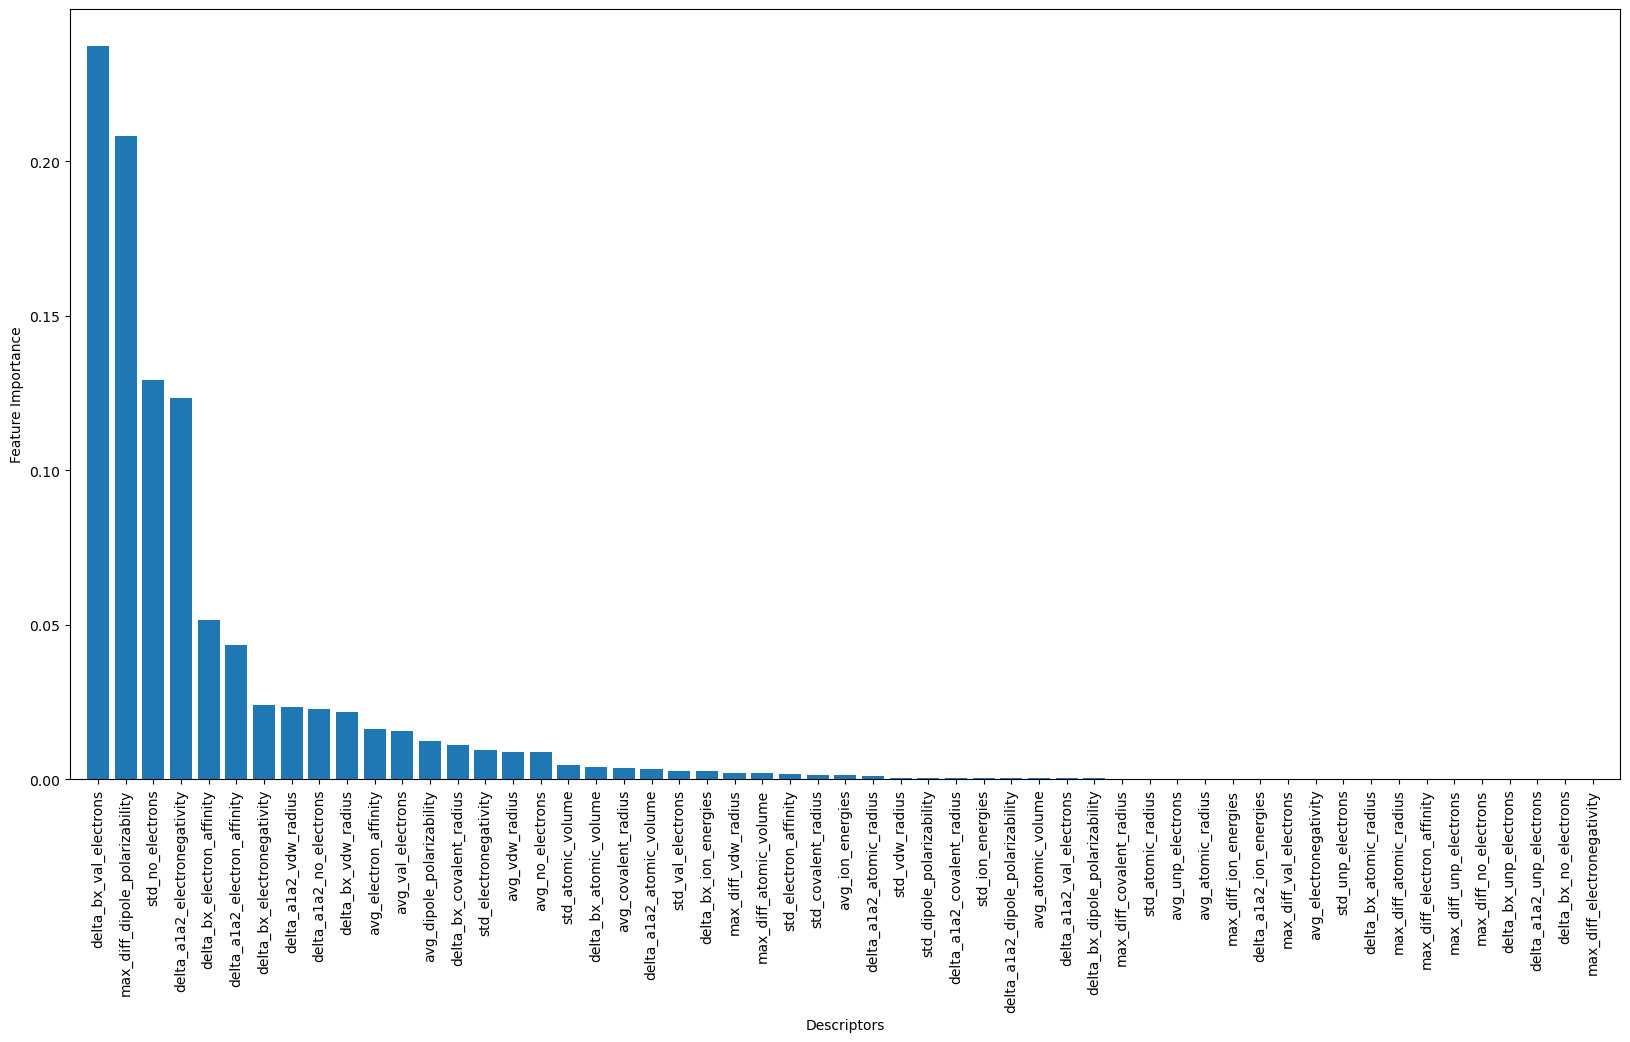

In [121]:
importances_eg = xgb_eg.feature_importances_
indices_eg = np.argsort(importances_eg)[::-1]  ## without [::-1] gives ascending order

plt.figure(figsize=(20,10))
plt.ylabel('Feature Importance')
plt.xlabel('Descriptors')
plt.bar(range(X_train.shape[1]), importances_eg[indices_eg], align='center')
desc_labels = df.columns[26:]
plt.xticks(range(X_train.shape[1]), desc_labels[indices_eg],  rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

### Optuna - hyperparameter tuning

In [122]:
import optuna
import random

def objective_eg_dnn(trial):
    n_estimators = trial.suggest_int('n_estimators',10,150)
    max_depth = trial.suggest_int('max_depth',5,50)
    learning_rate = trial.suggest_float('learning_rate', 0.05, 0.3, log=True)
    subsample = trial.suggest_float('subsample', 0.1, 1.0)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0.1, 1.0)
    gamma = trial.suggest_float('gamma', 0, 10)
    reg_alpha = trial.suggest_float('reg_alpha', 1e-8, 10, log=True)
    reg_lambda = trial.suggest_float('reg_lambda', 1e-8, 10, log=True)
    min_child_weight = trial.suggest_int('min_child_weight', 1, 10)
    scale_pos_weight = trial.suggest_int('scale_pos_weight', 1, 10)
    max_delta_step = trial.suggest_float('max_delta_step', 0, 10)
    random_state = 42

    model_xgb = xgb.XGBRegressor(n_estimators=n_estimators,max_depth=max_depth,learning_rate=learning_rate,subsample=subsample,
                                     colsample_bytree=colsample_bytree,gamma=gamma,reg_alpha=reg_alpha,reg_lambda=reg_lambda,
                                     min_child_weight=min_child_weight,scale_pos_weight=scale_pos_weight,max_delta_step=max_delta_step,
                                     random_state=random_state)

    # Train model
    xgb_eg_optuna = model_xgb.fit(X_train, y_train_eg)

    cv = KFold(n_splits=5,shuffle=True,random_state=random_state)
    cv_scores_xgb_eg_optuna = cross_val_score(xgb_eg_optuna,X_train,y_train_eg,cv=cv,scoring='r2',n_jobs=-1)
    avg_r2_cv_xgb_eg_optuna = cv_scores_xgb_eg_optuna.mean()

    # Return best R2 scores
    r2_train = r2_score(y_train_eg, model_xgb.predict(X_train))
    r2_test = r2_score(y_test_eg, model_xgb.predict(X_test))
#    return avg_r2_cv_xgb_eg_optuna
    return r2_train,avg_r2_cv_xgb_eg_optuna,r2_test

# Run Optuna optimization
#study = optuna.create_study(direction='minimize') # for minimizing loss
study_xgb_dnn = optuna.create_study(directions = ['maximize','maximize','maximize']) #(direction='maximize')
study_xgb_dnn.optimize(objective_eg_dnn, n_trials=500)

[I 2025-04-03 18:00:47,389] A new study created in memory with name: no-name-bbb4c854-9328-4a03-b707-4d63d1097f13
[I 2025-04-03 18:00:47,575] Trial 0 finished with values: [-0.0004902387336389591, -0.013067657296619517, -0.0672264430410201] and parameters: {'n_estimators': 87, 'max_depth': 36, 'learning_rate': 0.15290448111493324, 'subsample': 0.3786062796791504, 'colsample_bytree': 0.2270641880228279, 'gamma': 3.804882384666196, 'reg_alpha': 5.530513968045628e-08, 'reg_lambda': 0.0007385092055065717, 'min_child_weight': 1, 'scale_pos_weight': 6, 'max_delta_step': 9.008518648492636}.
[I 2025-04-03 18:00:47,755] Trial 1 finished with values: [-3.563953155216737e-05, -0.007637597504063542, -0.09345500236476068] and parameters: {'n_estimators': 127, 'max_depth': 50, 'learning_rate': 0.28423007525353144, 'subsample': 0.8935892979929473, 'colsample_bytree': 0.5664579383663494, 'gamma': 7.511541629108866, 'reg_alpha': 2.0268328899129438e-05, 'reg_lambda': 1.4472458998177525e-06, 'min_child_w

In [123]:
best_models_dnn = study_xgb_dnn.best_trials
#PRINT('Trial number',
for i in range(len(best_models_dnn)):
    print('Model No:',i,'\n=======', '\nTrial No:',best_models_dnn[i].number, '\nTrain R2:',best_models_dnn[i].values[0],'\nValid R2:',best_models_dnn[i].values[1],
         '\nTest  R2:',best_models_dnn[i].values[2],'\nParams  :',best_models_dnn[i].params,'\n=======')

Model No: 0 
Trial No: 201 
Train R2: 0.9001594440947402 
Valid R2: 0.45663296339199294 
Test  R2: 0.8392416688206039 
Params  : {'n_estimators': 98, 'max_depth': 22, 'learning_rate': 0.2542403797215009, 'subsample': 0.9267419133249986, 'colsample_bytree': 0.8812808023754642, 'gamma': 0.003262714909626485, 'reg_alpha': 6.953603747176939e-06, 'reg_lambda': 0.13374456114741803, 'min_child_weight': 10, 'scale_pos_weight': 2, 'max_delta_step': 7.573634973954194} 
Model No: 1 
Trial No: 203 
Train R2: 0.9460145574983322 
Valid R2: 0.41605618763188124 
Test  R2: 0.8571987868741301 
Params  : {'n_estimators': 98, 'max_depth': 10, 'learning_rate': 0.14019487015421597, 'subsample': 0.6162761392547128, 'colsample_bytree': 0.6887831481728923, 'gamma': 0.003262714909626485, 'reg_alpha': 3.656324469400258e-07, 'reg_lambda': 1.0539875205495264e-05, 'min_child_weight': 3, 'scale_pos_weight': 1, 'max_delta_step': 6.102441734332955} 
Model No: 2 
Trial No: 301 
Train R2: 0.9403355322807269 
Valid R2: 0

In [29]:
## 2,5,9,36,

In [134]:
import optuna
import random

def detailed_objective_eg_dnn(trial):
    n_estimators = trial.suggest_int('n_estimators',10,150)
    max_depth = trial.suggest_int('max_depth',5,50)
    learning_rate = trial.suggest_float('learning_rate', 0.05, 0.3, log=True)
    subsample = trial.suggest_float('subsample', 0.1, 1.0)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0.1, 1.0)
    gamma = trial.suggest_float('gamma', 0, 10)
    reg_alpha = trial.suggest_float('reg_alpha', 1e-8, 10, log=True)
    reg_lambda = trial.suggest_float('reg_lambda', 1e-8, 10, log=True)
    min_child_weight = trial.suggest_int('min_child_weight', 1, 10)
    scale_pos_weight = trial.suggest_int('scale_pos_weight', 1, 10)
    max_delta_step = trial.suggest_float('max_delta_step', 0, 10)
    random_state = 42

    model_xgb = xgb.XGBRegressor(n_estimators=best_models_dnn[36].params['n_estimators'],
                                    max_depth=best_models_dnn[36].params['max_depth'],
                                    learning_rate=best_models_dnn[36].params['learning_rate'],
                                    subsample=best_models_dnn[36].params['subsample'],
                                    colsample_bytree=best_models_dnn[36].params['colsample_bytree'],
                                    gamma=best_models_dnn[36].params['gamma'],
                                    reg_alpha=best_models_dnn[36].params['reg_alpha'],
                                    reg_lambda=best_models_dnn[36].params['reg_lambda'],
                                    min_child_weight=best_models_dnn[36].params['min_child_weight'],
                                    scale_pos_weight=best_models_dnn[36].params['scale_pos_weight'],
                                    max_delta_step=best_models_dnn[36].params['max_delta_step'],
                                    random_state=random_state)

    # Train model
    xgb_eg_optuna = model_xgb.fit(X_train,y_train_eg)

    cv = KFold(n_splits=5,shuffle=True,random_state=random_state)
    cv_scores_xgb_eg_optuna = cross_val_score(xgb_eg_optuna,X_train,y_train_eg,cv=cv,scoring='r2',n_jobs=-1)
    avg_r2_cv_xgb_eg_optuna = cv_scores_xgb_eg_optuna.mean()

    # Return best R2 scores and MAE
    r2_train = r2_score(y_train_eg, model_xgb.predict(X_train))
    r2_test = r2_score(y_test_eg, model_xgb.predict(X_test))
    r2_val = r2_score(y_val_eg, model_xgb.predict(X_val))

    mae_train = mean_absolute_error(y_train_eg, model_xgb.predict(X_train))
    mae_test = mean_absolute_error(y_test_eg, model_xgb.predict(X_test))
    mae_val = mean_absolute_error(y_val_eg, model_xgb.predict(X_val))
    
    print('R2 scores (train, CV, val, test) = ', r2_train,avg_r2_cv_xgb_eg_optuna,r2_val,r2_test)
    print('MAE values (train, val, test) = ', mae_train,mae_val,mae_test)  

    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,5))
    ax1.scatter(y_train_eg, model_xgb.predict(X_train).flatten(),label='Train($R^2$ = '+str(f'{r2_train:.3f}')+')',marker='o',color='green')
    ax1.scatter(y_val_eg, model_xgb.predict(X_val).flatten(),label='Val($R^2$ = '+str(f'{avg_r2_cv_xgb_eg_optuna:.3f}')+')',marker='^',color='blue')
    ax1.scatter(y_test_eg, model_xgb.predict(X_test).flatten(),label='Test($R^2$ = '+str(f'{r2_test:.3f}')+')',marker='s',color='red')
    ax1.plot([0,0.5],[0,0.5],color='gray',linestyle='dashed',linewidth=2.5)
    ax1.set_xlabel('Calculated Gap'),ax1.set_ylabel('Predicted Gap')
    ax1.legend()
    
    ax2.scatter(y_train_eg, model_xgb.predict(X_train).flatten(),label='Train($R^2$ = '+str(f'{r2_train:.3f}')+')',marker='o',color='green')
    ax2.scatter(y_test_eg, model_xgb.predict(X_test).flatten(),label='Test($R^2$ = '+str(f'{r2_test:.3f}')+')',marker='s',color='red')
    ax2.plot([0,0.5],[0,0.5],color='gray',linestyle='dashed',linewidth=2.5)
    ax2.set_xlabel('Calculated Gap'),ax1.set_ylabel('Predicted Gap')
    ax2.legend()
    
    plt.show()

R2 scores (train, CV, val, test) =  0.936301750654062 0.5488072764224229 0.8214514731864866 0.7491985731765392
MAE values (train, val, test) =  0.010323187023089033 0.019935255712877353 0.011721546694015629


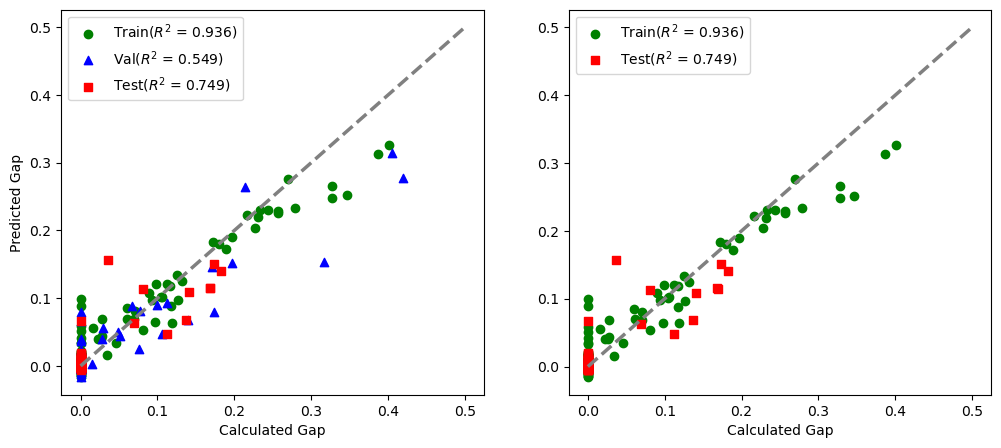

In [135]:
detailed_objective_eg_dnn(study_xgb_dnn.best_trials[36])

R2 scores (train, CV, val, test) =  0.912962370126762 0.5569564423838033 0.8138937427709023 0.7397401453069432
MAE values (train, val, test) =  0.011062693940610751 0.019047547184427083 0.011274542463620004


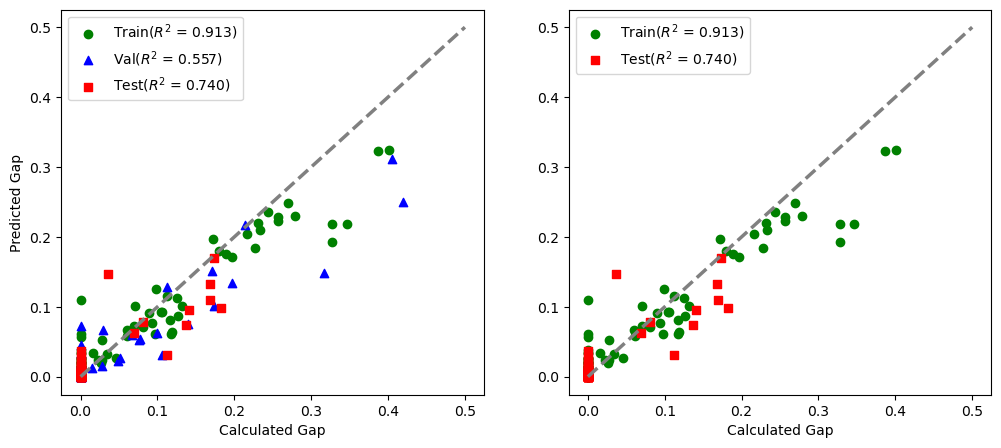

In [133]:
detailed_objective_eg_dnn(study_xgb_dnn.best_trials[9])

R2 scores (train, CV, val, test) =  0.9564179051215472 0.5443882728693292 0.842211917848469 0.7240125734692052
MAE values (train, val, test) =  0.007995665188934244 0.01823682686985593 0.011910692619763817


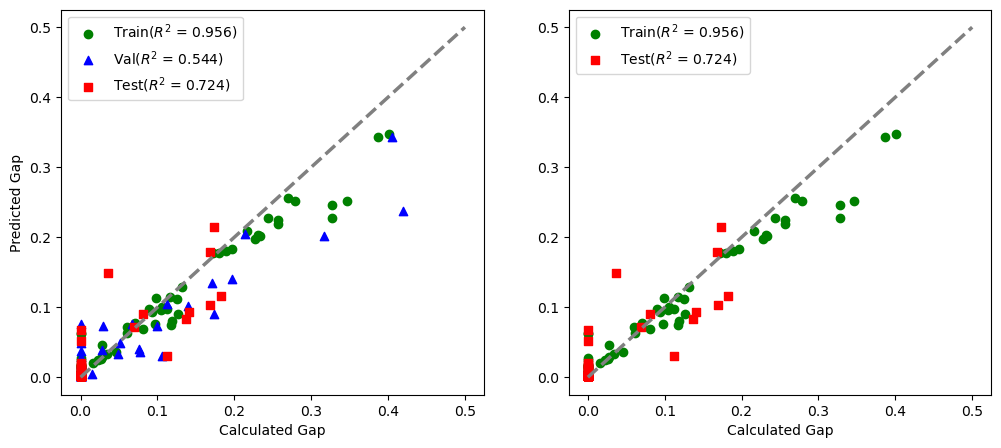

In [129]:
detailed_objective_eg_dnn(study_xgb_dnn.best_trials[5])

R2 scores (train, CV, val, test) =  0.9403355322807269 0.5474043389157194 0.8198140295047471 0.7622320292784409
MAE values (train, val, test) =  0.009845596589349461 0.019773659701397835 0.011248904414615938


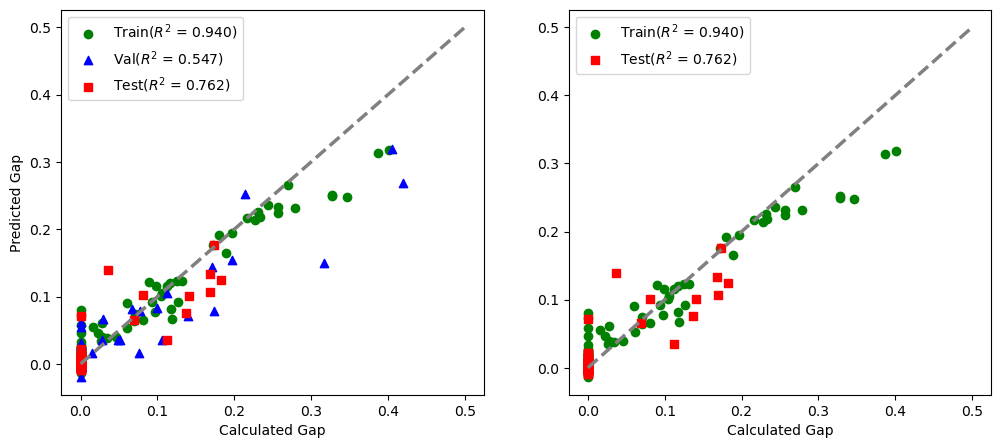

In [131]:
detailed_objective_eg_dnn(study_xgb_dnn.best_trials[2])

In [1]:
## Best trial 2